#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
import pandas as pd
import numpy as np
import cufflinks as cf
import chart_studio.plotly as py

# contains functions that can create entire figures at once
import plotly.express as px

import seaborn as sns
%matplotlib inline

# allows to create graph objects for making more customized plots
import plotly.graph_objects as go

# for plotly jupyter support
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# use plotly locally
cf.go_offline()

#### Load Dataset

The dataset is collected from Centers of Disease control and prevention [data.cdc.gov](https://www.cdc.gov/) under the category of [Vaccination Coverage among Pregnancy Women](https://data.cdc.gov/Pregnancy-Vaccination/Vaccination-Coverage-among-Pregnant-Women/h7pm-wmjc/data)

In [2]:
# Read the data
data = pd.read_csv('Vaccination_Coverage_among_Pregnant_Women.csv')

In [3]:
# Display Features
data.columns

Index(['Vaccine', 'Geography Type', 'Geography',
       'Survey Year/Influenza Season', 'Dimension Type', 'Dimension',
       'Estimate (%)', '95% CI (%)', 'Sample Size'],
      dtype='object')

In [4]:
# Display Values
data

,Vaccine,Geography Type,Geography,Survey Year/Influenza Season,Dimension Type,Dimension,Estimate (%),95% CI (%),Sample Size
0,Influenza,States,Alaska,2012,Age,≥18 Years,49.2,45.3 to 53.1,852.0
1,Influenza,States,Arkansas,2012,Age,≥18 Years,46.6,40.7 to 52.5,756.0
2,Influenza,States,Colorado,2012,Age,≥18 Years,56.1,52.1 to 60.0,1170.0
3,Influenza,States,Delaware,2012,Age,≥18 Years,41.6,38.4 to 44.8,981.0
4,Influenza,States,Georgia,2012,Age,≥18 Years,33.6,29.6 to 37.7,1007.0
...,...,...,...,...,...,...,...,...,...
4132,Tdap,States,Utah,2020,Race/Ethnicity,"White, Non-Hispanic",80.1,77.0 to 83.0,979.0
4133,Tdap,States,Vermont,2020,Race/Ethnicity,"White, Non-Hispanic",86.4,83.6 to 88.9,696.0
4134,Tdap,States,Virginia,2020,Race/Ethnicity,"White, Non-Hispanic",83.1,76.9 to 88.2,503.0
4135,Tdap,States,Washington,2020,Race/Ethnicity,"White, Non-Hispanic",80.9,76.2 to 85.0,352.0


In [5]:
# Display Dimension
data.shape

(4137, 9)

In [6]:
# Display Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4137 entries, 0 to 4136
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Vaccine                       4137 non-null   object 
 1   Geography Type                4137 non-null   object 
 2   Geography                     4137 non-null   object 
 3   Survey Year/Influenza Season  4137 non-null   int64  
 4   Dimension Type                4137 non-null   object 
 5   Dimension                     4137 non-null   object 
 6   Estimate (%)                  4137 non-null   object 
 7   95% CI (%)                    4137 non-null   object 
 8   Sample Size                   3933 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 291.0+ KB


In [7]:
# Display the Unique values
data['Vaccine'].value_counts()

Influenza    2891
Tdap         1246
Name: Vaccine, dtype: int64

In [8]:
# Display top 3 values
data.head(3)

,Vaccine,Geography Type,Geography,Survey Year/Influenza Season,Dimension Type,Dimension,Estimate (%),95% CI (%),Sample Size
0,Influenza,States,Alaska,2012,Age,≥18 Years,49.2,45.3 to 53.1,852.0
1,Influenza,States,Arkansas,2012,Age,≥18 Years,46.6,40.7 to 52.5,756.0
2,Influenza,States,Colorado,2012,Age,≥18 Years,56.1,52.1 to 60.0,1170.0


In [9]:
data['Survey Year/Influenza Season'].unique()

array([2012, 2020, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [10]:
# Make a new copy
new_data = data.copy()

In [11]:
# Display the presence of missing values
new_data.isnull().sum()

Vaccine                           0
Geography Type                    0
Geography                         0
Survey Year/Influenza Season      0
Dimension Type                    0
Dimension                         0
Estimate (%)                      0
95% CI (%)                        0
Sample Size                     204
dtype: int64

In [12]:
new_data.describe()

,Survey Year/Influenza Season,Sample Size
count,4137.000000,3933.000000
mean,2016.230602,805.390796
std,2.663058,2658.305251
min,2012.000000,30.000000
25%,2014.000000,169.000000
50%,2017.000000,325.000000
75%,2019.000000,659.000000
max,2020.000000,43737.000000


In [13]:
type(new_data['Estimate (%)'][0])

str

In [14]:
new_data['Estimate (%)'].unique()

array(['49.2', '46.6', '56.1', '41.6', '33.6', '42.0', '49.1', '53.0',
       '47.9', '66.1', '42.8', '66.0', '45.5', '58.8', '38.6', '37.8',
       '39.5', '43.6', '54.3', '47.3', '47.4', '60.4', '44.1', '48.9',
       '57.5', '60.9', '43.4', '58.6', '39.1', '49.6', '64.0', '57.3',
       '58.2', '74.7', '73.5', '62.9', '73.1', '41.3', '40.9', '68.7',
       '65.1', '77.1', '71.2', '53.7', '72.4', '70.5', '79.8', '58.4',
       '68.2', '48.1', '64.8', '68.5', '76.0', '75.0', '60.8', '67.6',
       '65.0', '74.1', '67.1', '64.5', '34.8', '61.1', '76.1', '54.9',
       '67.2', '64.4', '74.0', '64.7', '70.7', '63.3', '39.0', '51.3',
       '33.4', '27.6', '38.5', '42.5', '49.0', '41.0', '51.0', '37.0',
       '59.4', '32.6', '51.6', '30.7', '50.6', '29.5', '50.0', '38.1',
       '39.8', '56.7', '38.9', '41.9', '51.7', '53.2', '39.7', '52.4',
       '32.0', '40.5', '66.8', '56.4', '67.8', '63.5', '51.1', '49.7',
       '25.9', '29.9', '72.5', '50.3', '73.3', '43.9', '40.4', '69.5',
      

In [15]:
# There is some unwanted values so replacing it with NaN for easy cleaning of data
new_data['Estimate (%)'] = new_data['Estimate (%)'].replace('NR*', 'NaN')

In [16]:
new_data['Estimate (%)'].unique()

array(['49.2', '46.6', '56.1', '41.6', '33.6', '42.0', '49.1', '53.0',
       '47.9', '66.1', '42.8', '66.0', '45.5', '58.8', '38.6', '37.8',
       '39.5', '43.6', '54.3', '47.3', '47.4', '60.4', '44.1', '48.9',
       '57.5', '60.9', '43.4', '58.6', '39.1', '49.6', '64.0', '57.3',
       '58.2', '74.7', '73.5', '62.9', '73.1', '41.3', '40.9', '68.7',
       '65.1', '77.1', '71.2', '53.7', '72.4', '70.5', '79.8', '58.4',
       '68.2', '48.1', '64.8', '68.5', '76.0', '75.0', '60.8', '67.6',
       '65.0', '74.1', '67.1', '64.5', '34.8', '61.1', '76.1', '54.9',
       '67.2', '64.4', '74.0', '64.7', '70.7', '63.3', '39.0', '51.3',
       '33.4', '27.6', '38.5', '42.5', '49.0', '41.0', '51.0', '37.0',
       '59.4', '32.6', '51.6', '30.7', '50.6', '29.5', '50.0', '38.1',
       '39.8', '56.7', '38.9', '41.9', '51.7', '53.2', '39.7', '52.4',
       '32.0', '40.5', '66.8', '56.4', '67.8', '63.5', '51.1', '49.7',
       '25.9', '29.9', '72.5', '50.3', '73.3', '43.9', '40.4', '69.5',
      

In [17]:
new_data['Estimate (%)'] = new_data['Estimate (%)'].dropna()

In [18]:
# The column is in str so typecasting it to float for numerical computations
new_data['Estimate (%)'] = new_data['Estimate (%)'].astype(float)

In [19]:
new_data['Estimate (%)'][0]

49.2

In [20]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4137 entries, 0 to 4136
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Vaccine                       4137 non-null   object 
 1   Geography Type                4137 non-null   object 
 2   Geography                     4137 non-null   object 
 3   Survey Year/Influenza Season  4137 non-null   int64  
 4   Dimension Type                4137 non-null   object 
 5   Dimension                     4137 non-null   object 
 6   Estimate (%)                  3715 non-null   float64
 7   95% CI (%)                    4137 non-null   object 
 8   Sample Size                   3933 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 291.0+ KB


In [21]:
# Dropping all the null values
new_data = new_data.dropna()

In [22]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3715 entries, 0 to 4136
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Vaccine                       3715 non-null   object 
 1   Geography Type                3715 non-null   object 
 2   Geography                     3715 non-null   object 
 3   Survey Year/Influenza Season  3715 non-null   int64  
 4   Dimension Type                3715 non-null   object 
 5   Dimension                     3715 non-null   object 
 6   Estimate (%)                  3715 non-null   float64
 7   95% CI (%)                    3715 non-null   object 
 8   Sample Size                   3715 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 290.2+ KB


In [23]:
new_data.describe()

,Survey Year/Influenza Season,Estimate (%),Sample Size
count,3715.000000,3715.000000,3715.000000
mean,2016.241184,61.275074,849.202153
std,2.648391,15.169773,2728.862515
min,2012.000000,5.200000,32.000000
25%,2014.000000,52.000000,191.000000
50%,2017.000000,62.700000,346.000000
75%,2019.000000,72.100000,685.500000
max,2020.000000,98.200000,43737.000000


In [24]:
new_data.head()

,Vaccine,Geography Type,Geography,Survey Year/Influenza Season,Dimension Type,Dimension,Estimate (%),95% CI (%),Sample Size
0,Influenza,States,Alaska,2012,Age,≥18 Years,49.2,45.3 to 53.1,852.0
1,Influenza,States,Arkansas,2012,Age,≥18 Years,46.6,40.7 to 52.5,756.0
2,Influenza,States,Colorado,2012,Age,≥18 Years,56.1,52.1 to 60.0,1170.0
3,Influenza,States,Delaware,2012,Age,≥18 Years,41.6,38.4 to 44.8,981.0
4,Influenza,States,Georgia,2012,Age,≥18 Years,33.6,29.6 to 37.7,1007.0


<AxesSubplot: title={'center': 'Sample vs Estimate'}, xlabel='Estimate (%)', ylabel='Sample Size'>

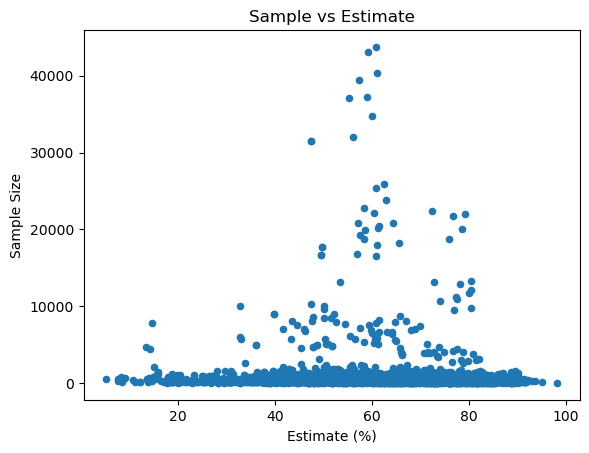

In [32]:
# plots the correlations between two variables
new_data.plot.scatter(x='Estimate (%)',
                      y='Sample Size',
                      title='Sample vs Estimate')

<AxesSubplot: title={'center': 'Estimate % of Vaccines'}>

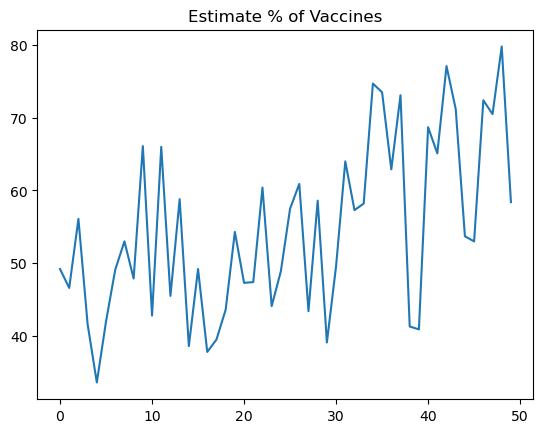

In [33]:
new_data['Estimate (%)'].head(50).plot.line(title="Estimate % of Vaccines")

<AxesSubplot: ylabel='Frequency'>

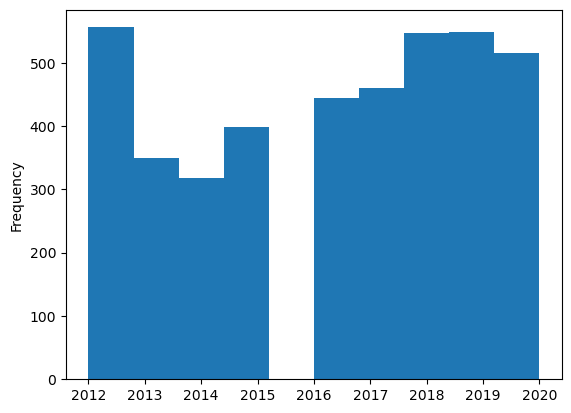

In [79]:
# Returns the distribution of the data
data['Survey Year/Influenza Season'].plot.hist()

array([[<AxesSubplot: ylabel='Frequency'>,
        <AxesSubplot: ylabel='Frequency'>,
        <AxesSubplot: ylabel='Frequency'>]], dtype=object)

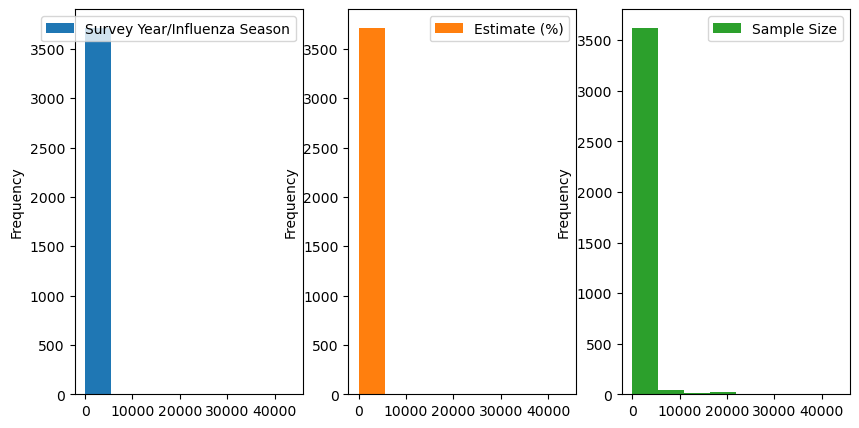

In [78]:
# hist returns the distribution of each data
new_data.plot.hist(subplots=True, layout=(1, 3), figsize=(10, 5), bins=8)

<AxesSubplot: >

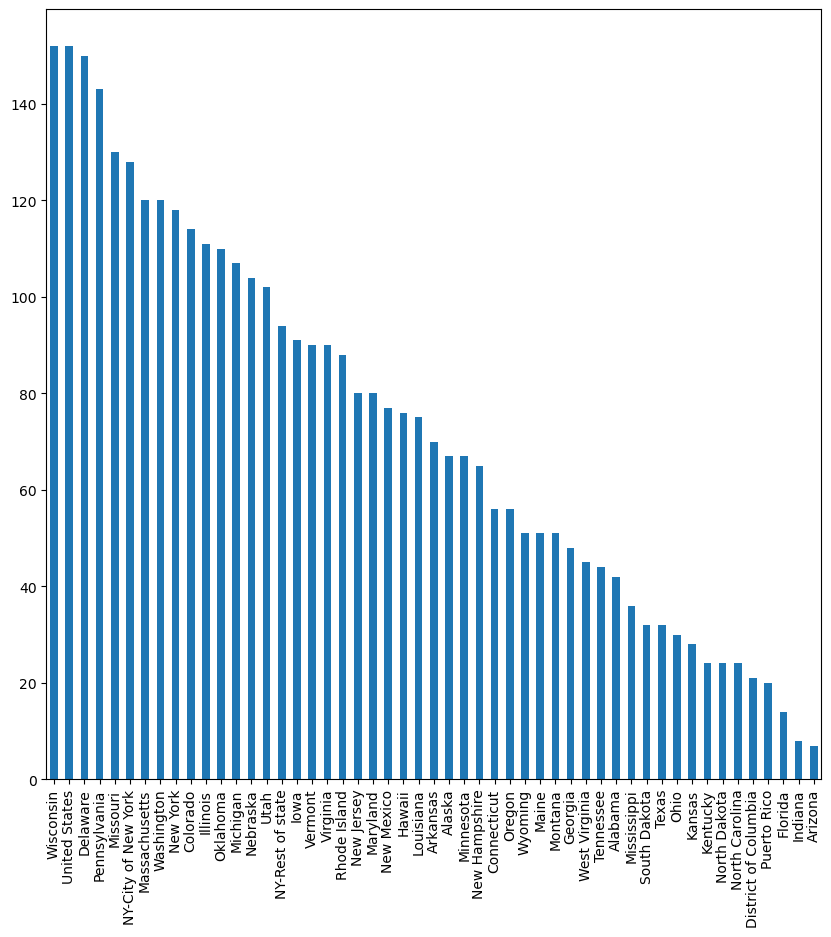

In [45]:
# plots the vertical bar chart
new_data['Geography'].value_counts().plot.bar(figsize=(10, 10))

<AxesSubplot: >

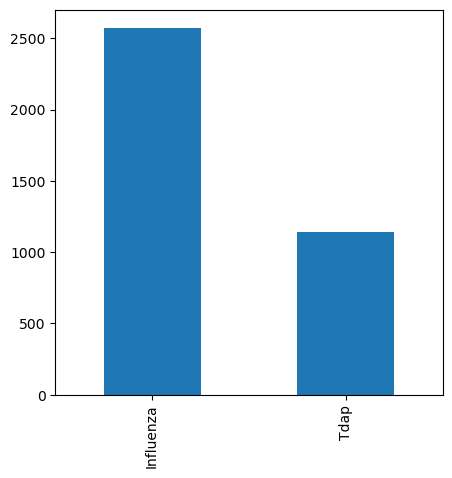

In [51]:
# Plots the vertical bar chart 
new_data['Vaccine'].value_counts().sort_index().plot.bar(figsize=(5, 5))

<AxesSubplot: >

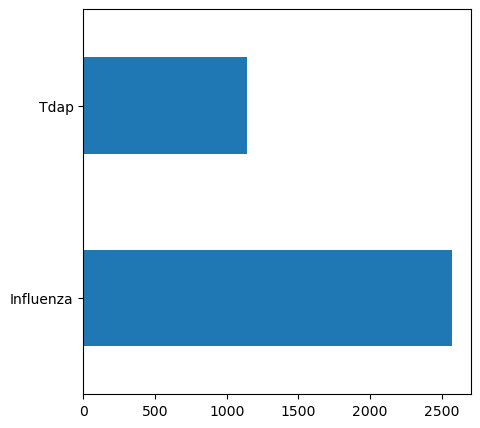

In [77]:
# Barh plot returns the horizontal bar chart
new_data['Vaccine'].value_counts().sort_index().plot.barh(figsize=(5, 5))

<AxesSubplot: >

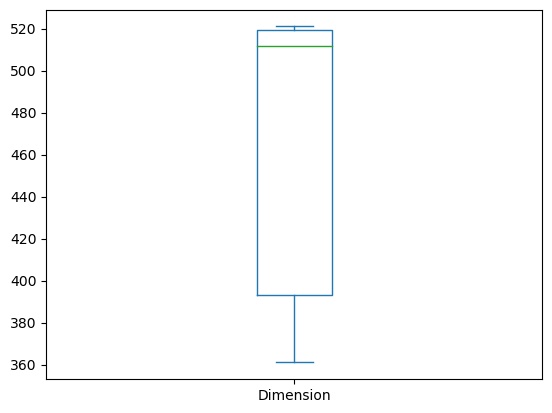

In [76]:
# Box plot plots the numeric data based on their quartiles
new_data['Dimension'].value_counts().plot.box()

<AxesSubplot: >

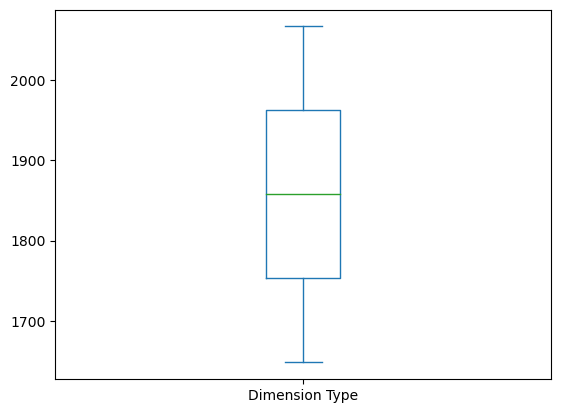

In [58]:
new_data['Dimension Type'].value_counts().plot.box()

#### Additional Tasks

<AxesSubplot: >

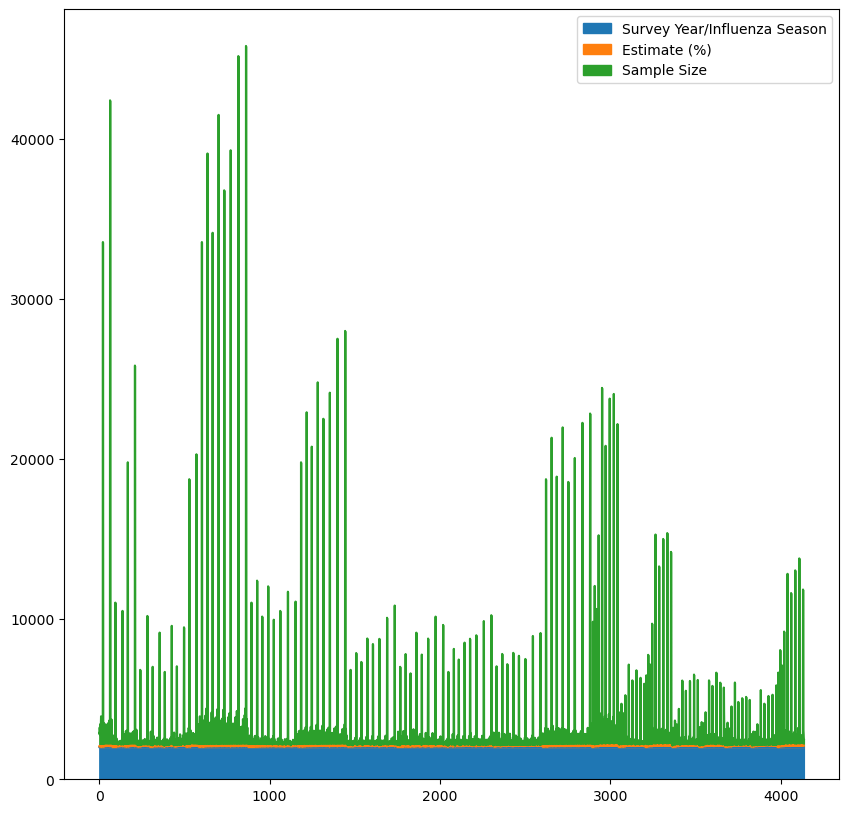

In [64]:
# Area plot displays the quantitative data visually.
new_data.plot.area(figsize=(10, 10))

<AxesSubplot: ylabel='Density'>

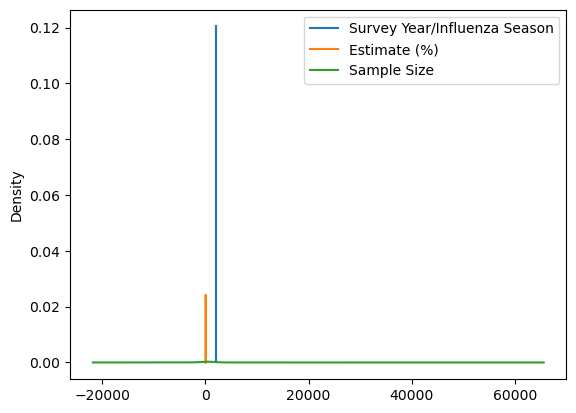

In [69]:
# KDE is used to find the probability density function which uses gaussian kernels.
new_data.plot.kde(bw_method=0.5)

<AxesSubplot: ylabel='Geography'>

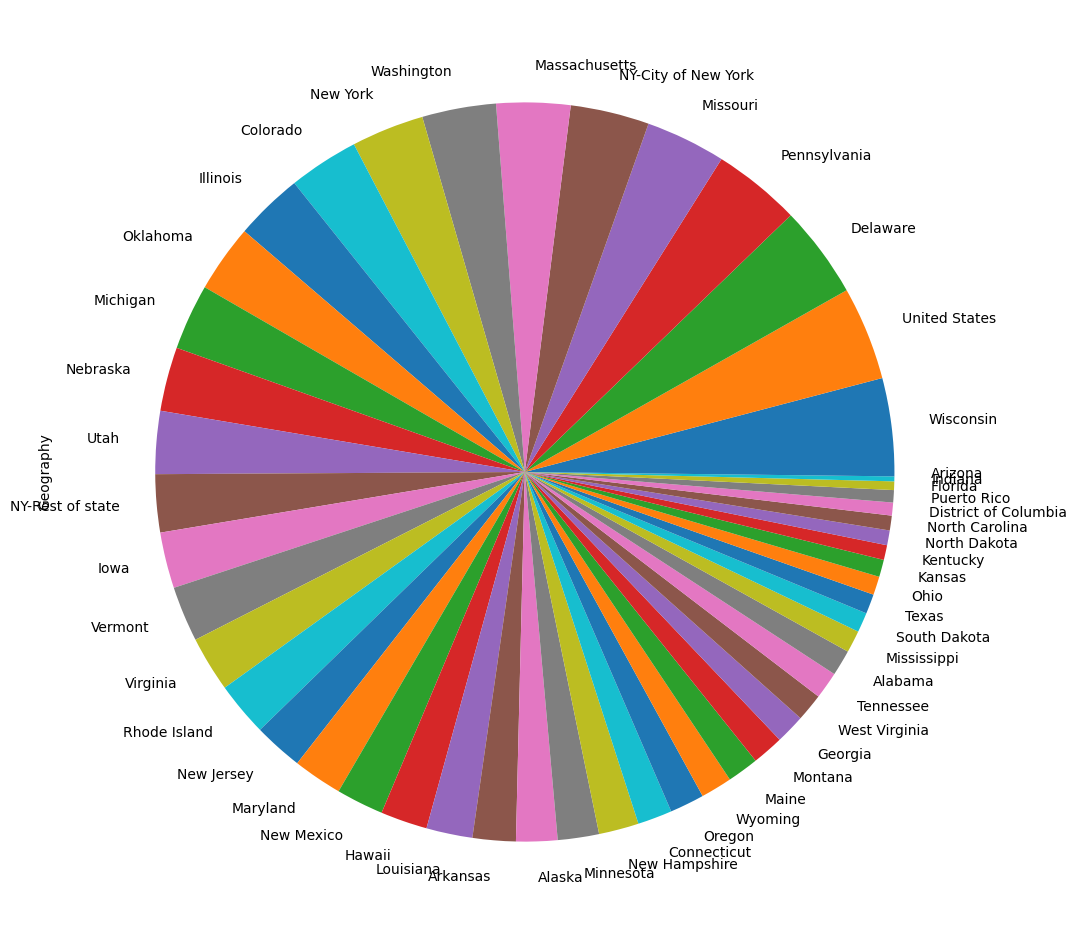

In [75]:
# pie plot used to return the proportional representation of the data
new_data['Geography'].value_counts().plot.pie(figsize=(12, 12))